In [2]:
from hpc import HPC

In [3]:
c = HPC()
c.getImages()

{12944574: <digitalocean.Image.Image at 0xb0f6efcc>,
 13048483: <digitalocean.Image.Image at 0xb0f0a62c>,
 13052943: <digitalocean.Image.Image at 0xb0f0a44c>,
 13109261: <digitalocean.Image.Image at 0xb0f0a3ac>}

In [6]:
res = c.getNodes()

6658951
ssh -oStrictHostKeyChecking=no root@104.236.6.48
ipython notebook --ip=104.236.6.48


In [4]:
c.createNode()

In [7]:
import pandas as p
im = digitalocean.Image(token = "fb13f87e074de9bcfba1fca4844b4823a85272d7902418a5776445bcdea250b9")
params = {}
#params['page'] = '1'
params['per_page'] = '10'
params['private'] = 'true'
res = im.get_data("images/", params=params)
p.DataFrame(res['images'])

,created_at,distribution,id,min_disk_size,name,public,regions,slug,type
0,2015-07-30T03:41:03Z,Ubuntu,12944574,20,liquid-rc01,False,[nyc3],None,snapshot
1,2015-08-07T10:26:45Z,Ubuntu,13048483,20,liquid-rc02,False,[nyc3],None,snapshot
2,2015-08-07T22:11:33Z,Ubuntu,13052943,40,liquid-rc03,False,[nyc3],None,snapshot
3,2015-08-12T08:01:05Z,Ubuntu,13109261,20,liquid-rc04,False,[nyc3],None,snapshot


In [82]:
import time
from IPython.display import clear_output

wait = 5

for droplet in c.getNodes(quiet=True):

    #ans = raw_input('turn off droplet {1}({0})? y/n: '.format(droplet.id, droplet.name))
    ans = 'y'
    if ans == 'y':
        while True:
            try:
                print
                droplet.destroy()
                print 'attempting shutdown({0}) '.format(droplet.id)
                #droplet.power_off()
                #c.makeNewSnapshot(droplet)
                print 'events:'
                for i in droplet.get_events():
                    print i
                print 'waiting {0} secs'.format(wait)
                time.sleep(5)
                clear_output()
            except:
                break
    else:
        print 'nothing done'

DataReadError: The resource you were accessing could not be found.

In [16]:
droplet = digitalocean.Droplet(token=c.token)
droplet.id = 6560282


{u'action': {u'completed_at': None,
  u'id': 59790077,
  u'region': {u'available': True,
   u'features': [u'private_networking', u'backups', u'ipv6', u'metadata'],
   u'name': u'New York 3',
   u'sizes': [u'512mb',
    u'1gb',
    u'2gb',
    u'4gb',
    u'8gb',
    u'16gb',
    u'32gb',
    u'48gb',
    u'64gb'],
   u'slug': u'nyc3'},
  u'region_slug': u'nyc3',
  u'resource_id': 6560282,
  u'resource_type': u'droplet',
  u'started_at': u'2015-08-14T14:50:48Z',
  u'status': u'in-progress',
  u'type': u'power_off'}}

59790332 destroy [completed]
59790077 power_off [completed]
59659013 create [in-progress]


In [188]:
c.take_snapshot

AttributeError: HPC instance has no attribute 'take_snapshot'

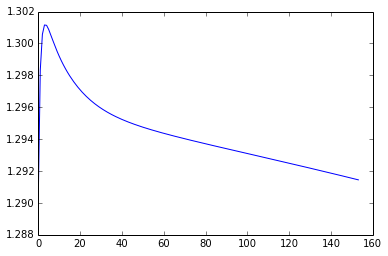

154


In [9]:
import matplotlib.pylab as plt
from qoreliquid import *

def viewTraining(fname, showPlot=False):
    df = p.read_csv(fname, header=None)
    %matplotlib inline
    df = df.ix[:,[2,3,4]]
    #df.ix[:,[2]].plot()
    #df.ix[:,[3]].plot()
    #df.ix[:,[4]].plot()
    #print df
    #if showPlot == True: plt.scatter(df.ix[:,[3]], df.ix[:,[4]]); plt.show();
    if showPlot == True: df.ix[:,[4]].plot(); plt.show();
    #if showPlot == True: df.ix[:,[3,4]].plot(); plt.show();
    
    dfp = df
    df = normalizeme(df)
    #if showPlot == True: plt.scatter(df.ix[:,[3]], df.ix[:,[4]]); plt.show();
    #if showPlot == True: df.plot(); plt.show();

    df = sigmoidme(df)
    #if showPlot == True: plt.scatter(df.ix[:,[3]], df.ix[:,[4]]); plt.show();
    if showPlot == True: df.plot(); plt.show();
    return dfp
    

#df1 = viewTraining('/mldev/bin/datafeeds/models/qorequant/EUR_USD-D.train.csv')
df2 = viewTraining('/mldev/bin/datafeeds/models/qorequant/EUR_USD-H4.train.csv')

#plot(df1.ix[:,4])
plot(df2.ix[:,4])
#legend([df1.columns[3]])
show();

#print len(df1)
print len(df2)



#legend([df1.columns, df2.columns])

#viewTraining('/mldev/bin/datafeeds/models/qorequant/USD_CAD-H4.train.csv')

#viewTraining('/mldev/bin/datafeeds/models/qorequant/EUR_USD-M30.train.csv')


In [240]:
from collections import deque
dd = deque()
dd

deque([])